┌ Warning: You are using Gtk on Windows which is currently not recommended. Your REPL/IDE and anything depending on task switches will become sluggish and much slower (up to ~85x slower).
└ @ Gtk C:\Users\suzu\.julia\packages\Gtk\X3A4U\src\Gtk.jl:74


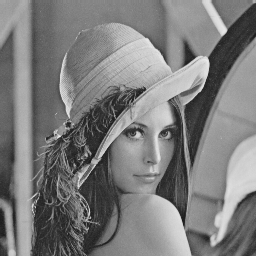

In [1]:
using Images, ImageView, TestImages
using Plots

imgg = testimage("lena_gray_256")
imgg_arr = channelview(imgg)
h, w = size(imgg_arr)
imgg # origin

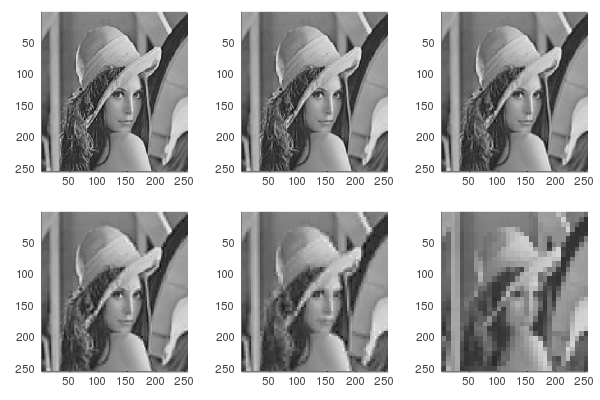

In [2]:
ps = []
m = 8
mat = [ i == 1 ? 1/sqrt(m) : sqrt(2/m) * cos((pi * (2j-1) * (i-1))/(2m))  for i in 1:m, j in 1:m]

for ij in 7:-1:2
    mask = [ i + j <= ij ? 1 : 0 for i in 1:m, j in 1:m]
    imgg_arr_tmp = deepcopy(imgg_arr)
    for i in 1:Int(h/m)
        for j in 1:Int(w/m)
            tmpA = imgg_arr_tmp[(8*(i-1)+1):(8*i),(8*(j-1)+1):8*j]
            tmpB = mat * tmpA * mat' .* mask
            tmpC = clamp.(mat' * tmpB * mat, 0.0, 1.0)
            imgg_arr_tmp[(8*(i-1)+1):(8*i),(8*(j-1)+1):8*j] .= tmpC
        end
    end
    imgg_inv = colorview(Gray, imgg_arr_tmp)
    p = plot(imgg_inv)
    ps = push!(ps, p)
end

plot(ps..., fmt = :png) # DCT